In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
circ = QuantumCircuit(3) # 3 qubits
# le qubit 0 correspond au gardien de droite
# le qubit 1 correspond au gardien de gauche
# le qubit 2 correspond au mensonge
# section Enigme
circ.h(0) # declarations l'incertitude des gardiens
circ.h(2) # declarations l'incertitude de qui ment
circ.cx(0,1) # lions les gardiens, car chacun connait la résonde de l'autre
circ.barrier() # partie mensonge, car un des gardient ment
circ.cx(2,1) # si le gardien de droite ment, alors le gardien de gauche dit la vérité
circ.x(2)
circ.cx(2,0) # si le gardien de gauche ment, alors le gardien de droite dit la vérité
circ.x(2)
# section Résolution
circ.barrier() # debut partie solution de resolution, la question négative
circ.swap(0,1) # on inverse les résultats des gardiens
circ.x(0)
circ.x(1)
circ.barrier() # partie mensonge, car un des gardient ment
circ.cx(2,1)
circ.x(2)
circ.cx(2,0)
circ.x(2)

In [3]:
# mesure des qubits
circ.measure_all()

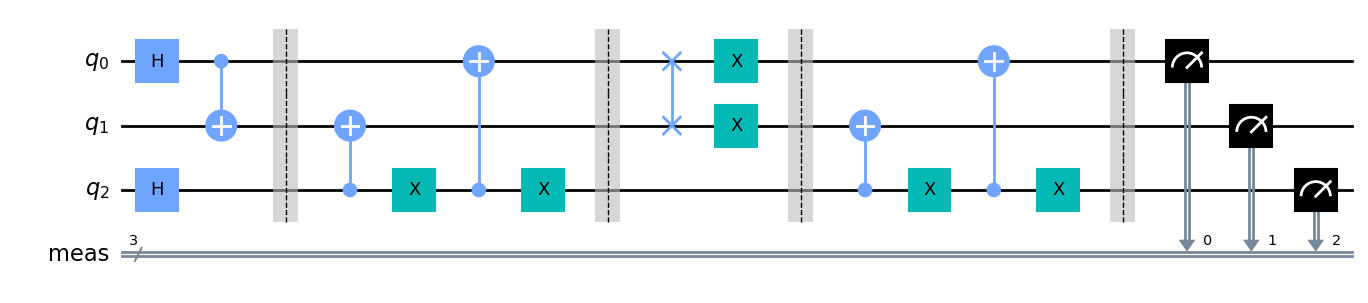

In [4]:
circ.draw(output='mpl')

faisont un echantillonage de 100000 pour connaître la probabilité d'obenir 000, 011, 100, 111

In [5]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ, shots=100000)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)

La sortie nous donne une prédiction du réseau de porte quantique

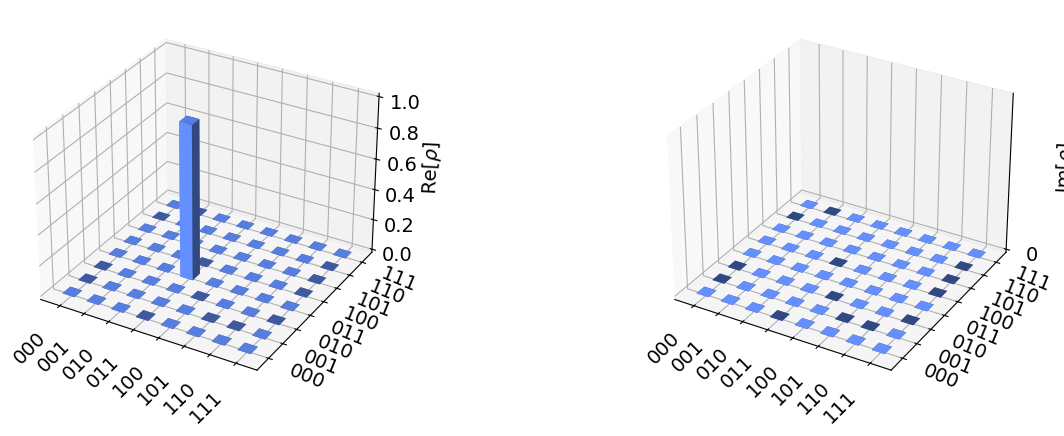

In [6]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

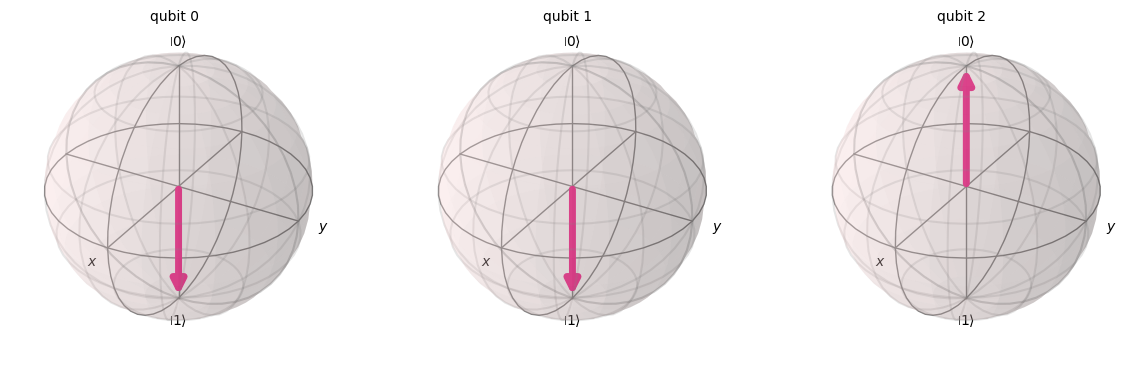

In [7]:
# visualisation de la sortie avec la sphère de bloch
# elle nous permet de voir la sortie en 3D et de commencé à apprehender la superposition des états,
# on peut voir qu'une fois les mesure faite il y a effondrement de la fonction d'onde et que l'état de chaque bit et dans un état connu.
plot_bloch_multivector(outputstate)

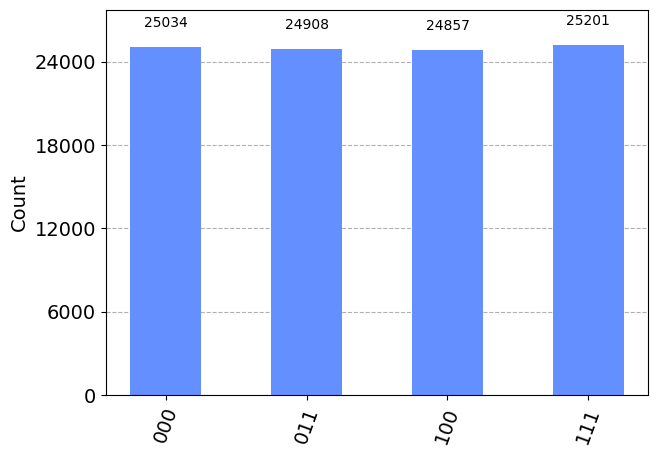

In [8]:
# print histogram
counts = result.get_counts(circ)
plot_histogram(counts)